<h1 align=center><font size = 5>Assignment 1: Exploratory Data Analysis and Data Preparation</font>

<font size = 4>Submitted by: Lujain Khalil</font>

<font size = 4>AUS Email: g00082632@alumni.aus.edu</font>

## Question 1. Attribute Classification

For each attribute in the selected dataset:
*   Classify whether the attribute is categorical or numerical.
*   If categorical, further classify it as nominal or ordinal.
*   If numerical, further classify it as continuous or discrete, and determine if it is measured on a ratio scale or an interval scale

In order to explore the attributes, the dataset is first loaded and displayed

In [88]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv('bank_marketing.csv')
df.head(10)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Pdays,Poutcome,Outcome
0,58.0,management,married,tertiary,no,2143,yes,no,cellular,-1,NaN,no
1,44.0,technician,single,secondary,no,29,yes,no,cellular,-1,NaN,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,cellular,-1,NaN,no
3,47.0,blue-collar,married,NaN,no,1506,yes,no,cellular,-1,NaN,no
4,NaN,NaN,single,NaN,no,1,no,no,cellular,-1,NaN,no
5,35.0,management,married,tertiary,no,231,yes,no,cellular,-1,NaN,no
6,28.0,management,single,tertiary,no,447,yes,yes,cellular,-1,NaN,no
7,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,cellular,-1,NaN,no
8,58.0,retired,married,primary,no,121,yes,no,cellular,-1,NaN,no
9,43.0,technician,single,secondary,no,593,yes,no,cellular,-1,NaN,no


In [89]:
df.shape

(45211, 12)

We can see that the data includes 12 features, each with it's own properties. To further explore this and decide how they're classified, some exploratory tables will be generated.

In [90]:
print("Data types of each feature:")
print(df.dtypes)

Data types of each feature:
Age          float64
Job           object
Marital       object
Education     object
Default       object
Balance        int64
Housing       object
Loan          object
Contact       object
Pdays          int64
Poutcome      object
Outcome       object
dtype: object


In [91]:
print('Number of unique values per column:')
print(df.nunique(axis=0))

Number of unique values per column:
Age            77
Job            10
Marital         3
Education       3
Default         2
Balance      7168
Housing         2
Loan            2
Contact         2
Pdays         559
Poutcome        3
Outcome         2
dtype: int64


From the generated `df.dtypes` and `df.nunique(axis=0)` table aboves, we can classify the features into categorical or numerical by observing the number of unique values within every feature and their data types. Features of type `object` are classified as categorical, and features of types `int64` and `float64` are classified as numerical.


*   **Categorical features**: Job, Marital, Education, Default, Housing, Loan, Contact, Poutcome, Outcome
*   **Numerical features**: Age, Balance, Pdays

To further classify categorical features into nominal or ordinal, a list of unique categories in each feature is generated to determine whether or not they're nominal or ordinal in nature.   



In [92]:
for col in ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Poutcome', 'Outcome']:
  print(f'{col:15}: {df[col].unique()}')

Job            : ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'housemaid' 'student']
Marital        : ['married' 'single' 'divorced']
Education      : ['tertiary' 'secondary' nan 'primary']
Default        : ['no' 'yes' nan]
Housing        : ['yes' 'no']
Loan           : ['no' 'yes']
Contact        : ['cellular' nan 'telephone']
Poutcome       : [nan 'failure' 'other' 'success']
Outcome        : ['no' 'yes']


The only feature with a meaningful order is `Education`, where the values can be ordered as `primary`, `secondary`, then `tertiary`, making it the only ordinal feature.

To determine whether the numerical features are continuos or discrete, we can look at their descriptions and understand what they indicate.


*   **Age**: *Continuos* (can take any value in a range), and measures on a *ratio* scale (there is a true 0 point)
*   **Balance**: *Continuos* (can take any value in a range), and measures on a *ratio* scale (there is a true 0 point)
*   **Pdays**: *Discrete* (refers to the count of days, cannot be fractional), and measures on a *ratio* scale (there is a ture 0 point)

To summarize, the features are classified as follows:



In [93]:
q1_answer = pd.DataFrame({
    "Features": ["Age", "Job", "Marital", "Education", "Default", "Balance", "Housing", "Loan", "Contact", "Pdays", "Poutcome", "Outcome"],
    "Type":     ["Numerical", "Categorical", "Categorical", "Categorical", "Categorical", "Numerical", "Categorical", "Categorical", "Categorical", "Numerical", "Categorical", "Categorical"],
    "Sub-Type": ["Continuous", "Nominal", "Nominal", "Ordinal", "Nominal", "Continuous", "Nominal", "Nominal", "Nominal", "Discrete", "Nominal", "Nominal"],
    "Scale":    ["Ratio", "-", "-", "-", "-", "Ratio", "-", "-", "-", "Ratio", "-", "-"]
})

q1_answer

,Features,Type,Sub-Type,Scale
0,Age,Numerical,Continuous,Ratio
1,Job,Categorical,Nominal,-
2,Marital,Categorical,Nominal,-
3,Education,Categorical,Ordinal,-
4,Default,Categorical,Nominal,-
5,Balance,Numerical,Continuous,Ratio
6,Housing,Categorical,Nominal,-
7,Loan,Categorical,Nominal,-
8,Contact,Categorical,Nominal,-
9,Pdays,Numerical,Discrete,Ratio


## Question 2. Visualization of Attributes

*  Visualize each attribute individually using appropriate plots:
 *  For categorical attributes: Use bar plots to show the distribution of categories.
 *  For numerical attributes: Use histograms to show the distribution of the values.
*  Comment on the distribution of each attribute (e.g., skewness, normality, or presence of outliers)

### Categorical features

*   **Job**: Most of the clients are blue-collar workers with a frequency of 9732
*   **Marital**: Over 50% of the clients are married
*   **Education**: Most of the clients hold a secondary education
*   **Default**: The overwhelming majority of clients do not have credit by default
*   **Housing**: The clients with or without a housing loan are almost split in half, but most clients do have a loan
*   **Loan**: The overwhelming majority of clients do not have a personal loan
*   **Contact**: The overwhelming majority of clients can be reached with cellular communication
*   **Poutcome**: The previous marketing campaign failed for most clients
*   **Outcome**: Most clients did not subscribe to the new product

Job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
housemaid        1240
student           938
Name: count, dtype: int64



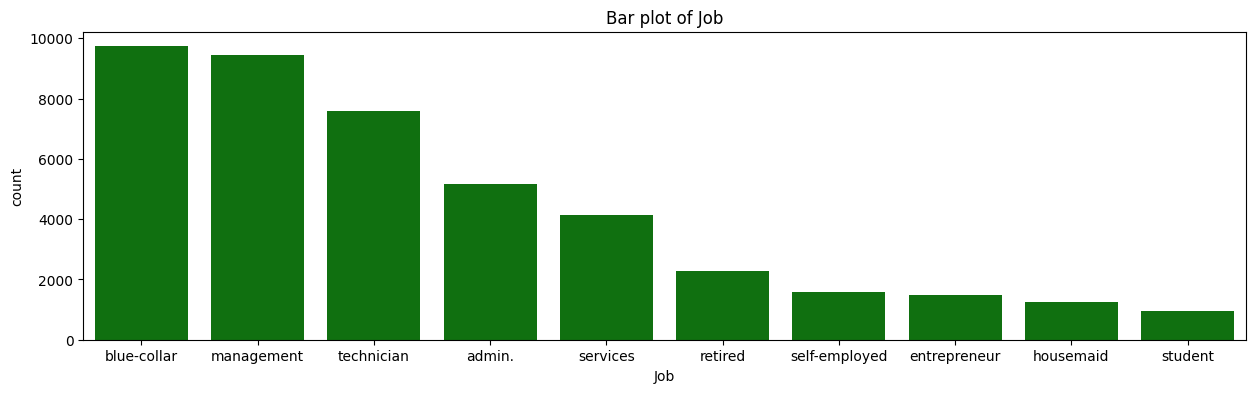


-------------------------------------------------------------------------

Marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64



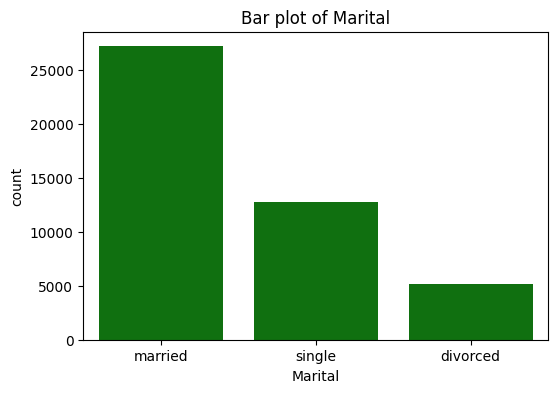


-------------------------------------------------------------------------

Education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64



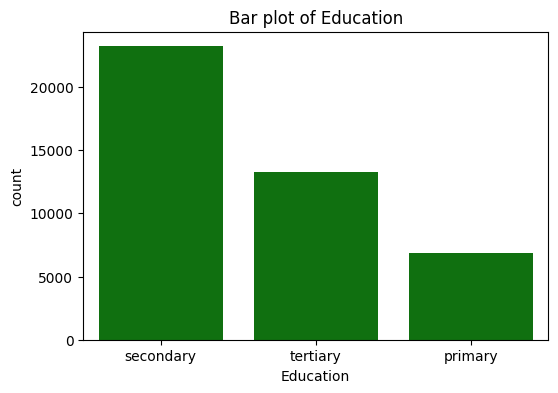


-------------------------------------------------------------------------

Default
no     43509
yes      815
Name: count, dtype: int64



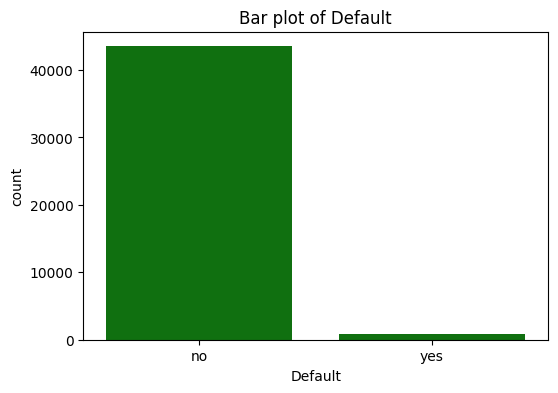


-------------------------------------------------------------------------

Housing
yes    25130
no     20081
Name: count, dtype: int64



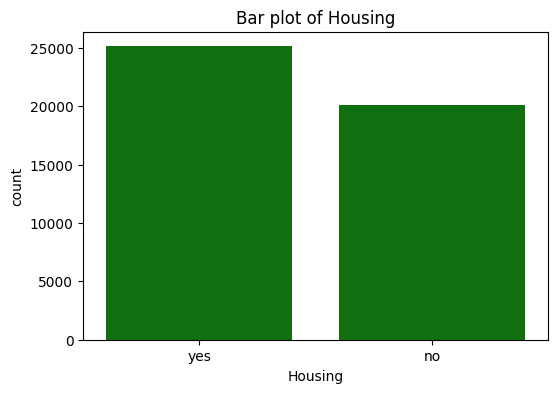


-------------------------------------------------------------------------

Loan
no     37967
yes     7244
Name: count, dtype: int64



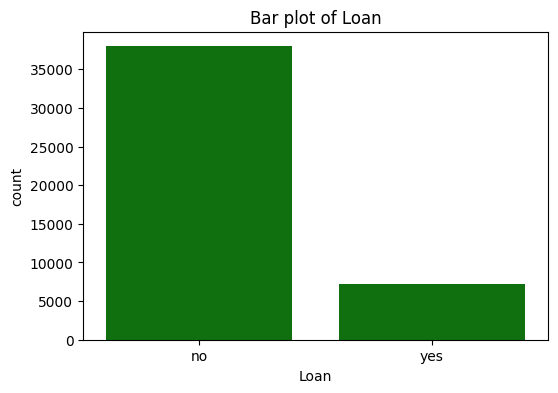


-------------------------------------------------------------------------

Contact
cellular     41285
telephone     2906
Name: count, dtype: int64



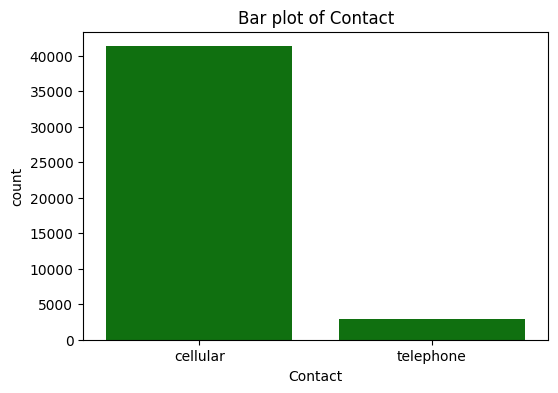


-------------------------------------------------------------------------

Poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64



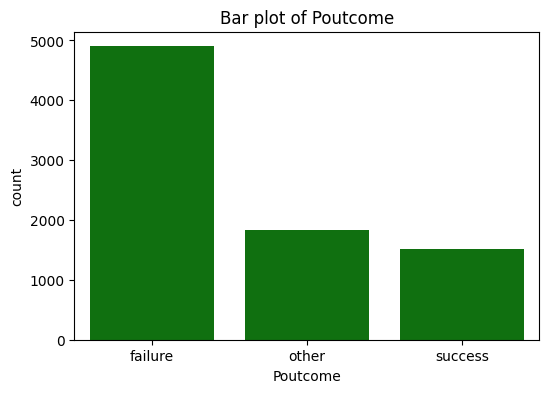


-------------------------------------------------------------------------

Outcome
no     39922
yes     5289
Name: count, dtype: int64



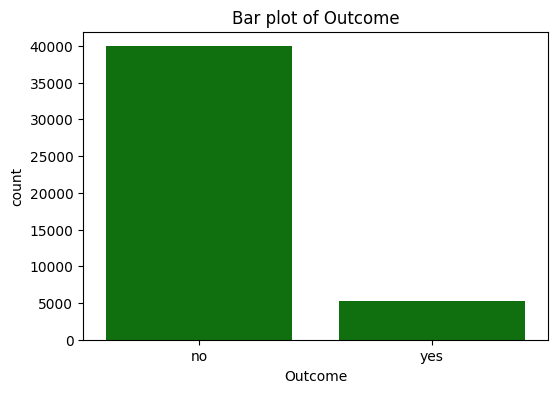


-------------------------------------------------------------------------



In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Poutcome', 'Outcome']:
  print(f'{df[feature].value_counts()}\n')

  if (feature == 'Job'):
    plt.figure(figsize=(15, 4)) # Larger figure size for 'Job' to fit category names
  else:
    plt.figure(figsize=(6, 4))

  sns.countplot(data=df, x=feature, color='green', order=df[feature].value_counts().index)
  plt.title(f"Bar plot of {feature}")
  plt.show()
  print('\n-------------------------------------------------------------------------\n')

### Numerical features

*   **Age**: The ages of clients is slightly right skewed. The mean and median values are very similar. Their ages range from as young as 18 to as old as 95, which is huge
*   **Balance**: The average yearly balance in the client's accounts is heavily skewed right skewed with visible outliers in the higher balance values. There is a significant different between the mean and median values. Balance ranges from negative values all the way to 102,127, which is a huge range
*   **Pdays**: It is clear that most clients were not contacted in the previous campaign. The data is heavily right skewed with a clear presene of outliers in the higher Pdays values. The mean Pdays value is much larger than the median



Mean of Age: 40.924425508137176
Median of Age: 39.0
Mode of Age: 32.0
Max of Age: 95.0
Min of Age: 18.0
Range of Age: 77.0



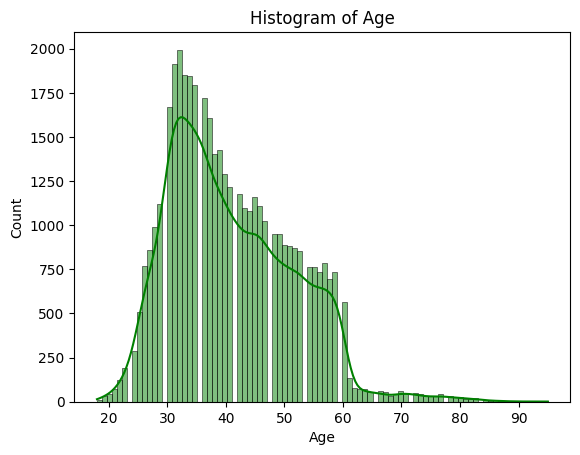


-------------------------------------------------------------------------

Mean of Balance: 1362.2720576850766
Median of Balance: 448.0
Mode of Balance: 0
Max of Balance: 102127
Min of Balance: -8019
Range of Balance: 110146



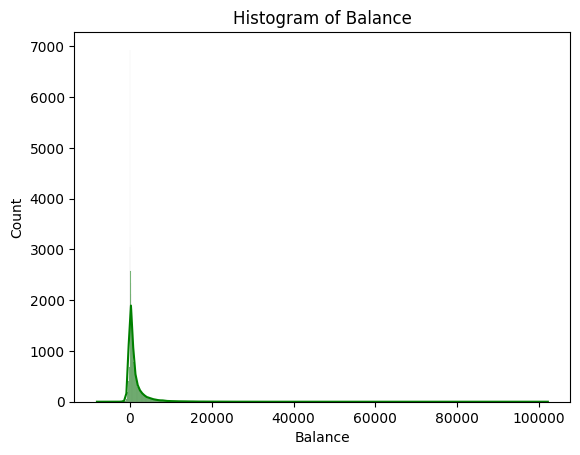


-------------------------------------------------------------------------

Mean of Pdays: 40.19782796222158
Median of Pdays: -1.0
Mode of Pdays: -1
Max of Pdays: 871
Min of Pdays: -1
Range of Pdays: 872



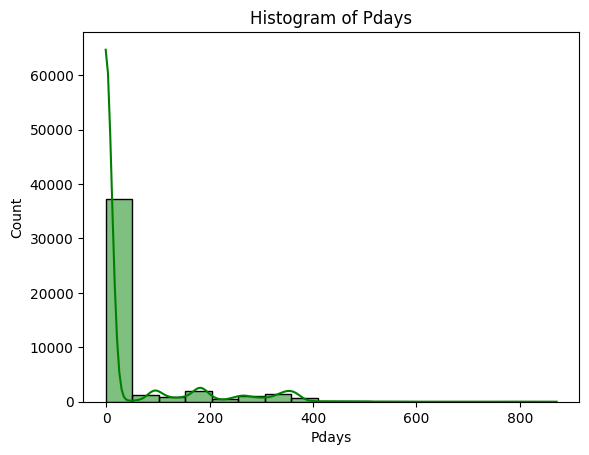


-------------------------------------------------------------------------



In [95]:
for feature in ['Age', 'Balance', 'Pdays']:
  print(f"Mean of {feature}: {df[feature].mean()}")
  print(f"Median of {feature}: {df[feature].median()}")
  print(f"Mode of {feature}: {df[feature].mode()[0]}")
  print(f"Max of {feature}: {df[feature].max()}")
  print(f"Min of {feature}: {df[feature].min()}")
  print(f"Range of {feature}: {df[feature].max() - df[feature].min()}\n")

  sns.histplot(df[feature], kde=True, color='green')
  plt.title(f"Histogram of {feature}")
  plt.show()
  print('\n-------------------------------------------------------------------------\n')

## Question 3.  Imputation of Missing Values

*   Explore and handle the missing values in the dataset.
*   Unlike the attribute we encountered in class, some attributes might have missing values because the feature does not exist for certain clients. Be mindful of this as you prepare to impute missing values.
*   Use appropriate imputation techniques for each attribute.

After imputation, provide a summary of the changes made, including the methods used and any assumptions made during imputation.

The first step is to explore the number of missing values present in the dataset for each feature, as well as the percentage of values that are missing for each feature. A correlation matrix is also generated to understand how the features relate to each other, possibly influencing how to impute missing values.

In [96]:
pd.DataFrame({
    'Frequency': df.isnull().sum(),
    'Percentage': df.isnull().sum() / len(df) * 100
})

,Frequency,Percentage
Age,2260,4.998783
Job,1591,3.519055
Marital,0,0.000000
Education,1857,4.107407
Default,887,1.961912
Balance,0,0.000000
Housing,0,0.000000
Loan,0,0.000000
Contact,1020,2.256088
Pdays,0,0.000000


Seeing the distributions generated from the previous questions, along with their missing values, the following decisions were made:


*   **Age**: Since the values are slightly right skewed with very similar mean and median values, the missing values will be replaced with the median of all clients (39). I would say, however, a more robust approach to this would be to replace `Age` with the median of the client's corresponding `Job`, which I think is more logical since `Jobs` include `retired` (more likely to be older) and `student` (more likely to be younger). If both `Job` and `Age` are missing, then the median of all clients (39) could be used. For simplicity, however, this approach will not be applied, and the median of all clients (39) will be used to impute all missing `Age` values
*   **Job**: The mode (blue collar) will be used to impute all the missing `Job` values
*   **Education**: The mode (secondary) will be used to impute missing `Education` values
*   **Default**: The mode (no) will be used to impute missing `Default` values
*   **Contact**: The mode (cellular) will be used to impute missing `Contact` values
*   **Poutcome**: This gets a little tricky, since 81.7% of the values are missing. From the graphs generated above, we can clearly see that most clients were not contacted in a previous campaign in the first place (`Pdays` value of -1). The data for these two categories will be explored further before deciding on how to impute `Poutcome`

In [97]:
from sklearn.impute import SimpleImputer

imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')

df['Age'] = imputer_median.fit_transform(df[['Age']])

df['Job'] = imputer_mode.fit_transform(df[['Job']]).ravel()
df['Education'] = imputer_mode.fit_transform(df[['Education']]).ravel()
df['Default'] = imputer_mode.fit_transform(df[['Default']]).ravel()
df['Contact'] = imputer_mode.fit_transform(df[['Contact']]).ravel()

Exploring `Poutcome` and `Pdays`:

In [99]:
df_pdays = df[df['Pdays'] == -1]

print('----- Original data -----')
print(f'Length: {len(df)}')
null = df['Poutcome'].isnull().sum()
print(f'Number of missing Poutcome values: {null}\n')

print('----- Data filtered with Pdays == -1 -----')
print(f'Length: {len(df_pdays)}')
null_pdays = df_pdays['Poutcome'].isnull().sum()
print(f'Number of missing Poutcome values: {null_pdays}\n')

print(f'Clients with missing Poutcome value but with Pday != -1: {null - null_pdays}')

----- Original data -----
Length: 45211
Number of missing Poutcome values: 36959

----- Data filtered with Pdays == -1 -----
Length: 36954
Number of missing Poutcome values: 36954

Clients with missing Poutcome value but with Pday != -1: 5


From this, we can observe that all the clients not contacted in the previous campaign (`Pdays == -1`) have a missing `Poutcome` value. Only 5 clients with a missing `Poutcome` value have been contacted in the previous campaign.

For the 36954 clients with `Pdays == -1`, a new `Poutcome` category will be created and called `not contacted`. For the 5 other clients, the mode (failure) will be imputed to their `Poutcome` feature

In [100]:
df.loc[df['Pdays'] == -1, 'Poutcome'] = 'not contacted'
df.loc[df['Pdays'] != -1, 'Poutcome'] = df.loc[df['Pdays'] != -1, 'Poutcome'].fillna('failure')

df['Poutcome'].value_counts()

,count
Poutcome,
not contacted,36954
failure,4906
other,1840
success,1511


Confirming that all null values were imputed successfully:

In [108]:
pd.DataFrame({
    'Frequency': df.isnull().sum(),
    'Percentage': df.isnull().sum() / len(df) * 100
})

,Frequency,Percentage
Age,0,0.0
Job,0,0.0
Marital,0,0.0
Education,0,0.0
Default,0,0.0
Balance,0,0.0
Housing,0,0.0
Loan,0,0.0
Contact,0,0.0
Pdays,0,0.0


A summary of the imputation strategy for each feature is summarized below:

In [107]:
q3_answer = pd.DataFrame({
    'Feature': ['Age', 'Job', 'Education', 'Default', 'Contact', 'Poutcome'],
    'Imputing Strategy': ['Median', 'Mode', 'Mode', 'Mode', 'Mode', 'If Pdays = -1, then \'not contacted\', otherwise: Mode \'failure\''
    ]
})
pd.set_option('display.max_colwidth', None)
q3_answer

,Feature,Imputing Strategy
0,Age,Median
1,Job,Mode
2,Education,Mode
3,Default,Mode
4,Contact,Mode
5,Poutcome,"If Pdays = -1, then 'not contacted', otherwise: Mode 'failure'"


## Question 4. Correlation Calculation

*   (Numerical, Numerical): Use the appropriate correlation coefficient to calculate the correlation between all pairs of numerical attributes.
*   (Categorical, Categorical): Use the appropriate correlation coefficient to calculate the correlation between all pairs of categorical attributes.

Discuss the correlation results and whether any features are highly correlated and could be redundant.

The correlations calculated are as follows:

*   **Numerical**: Pearson and Spearman's correlations
*   **Categorical**: Chi-squared test

A loop is used to iterate through all possible pairs, avoiding repeated calculations. The results are then stored in a dataframe for easier interpretation of results

In [119]:
from scipy.stats import pearsonr, spearmanr, chi2_contingency

categorical = ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Poutcome', 'Outcome']
numerical = ['Age', 'Balance', 'Pdays']

pearson_results = []
spearman_results = []
chi2_results = []

for i, feature_A in enumerate(numerical):
  for feature_B in numerical[i+1:]:
    pearson_corr, pearson_p = pearsonr(df[feature_A], df[feature_B])
    spearman_corr, spearman_p = spearmanr(df[feature_A], df[feature_B])

    pearson_results.append({
      'Feature A': feature_A,
      'Feature B': feature_B,
      'Pearson Correlation': pearson_corr,
      'Pearson p-value': pearson_p
    })

    spearman_results.append({
      'Feature A': feature_A,
      'Feature B': feature_B,
      'Spearman Correlation': spearman_corr,
      'Spearman p-value': spearman_p
    })

for i, feature_A in enumerate(categorical):
  for feature_B in categorical[i+1:]:
    contingency_table = pd.crosstab(df[feature_A], df[feature_B])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    chi2_results.append({
      'Feature A': feature_A,
      'Feature B': feature_B,
      'Chi-squared Statistic': chi2,
      'p-value': p,
      'Degrees of Freedom': dof
    })

pearson_results_df = pd.DataFrame(pearson_results)
spearman_results_df = pd.DataFrame(spearman_results)
chi2_results_df = pd.DataFrame(chi2_results)

In [120]:
pearson_results_df

,Feature A,Feature B,Pearson Correlation,Pearson p-value
0,Age,Balance,0.096435,7.353461e-94
1,Age,Pdays,-0.023974,3.428760e-07
2,Balance,Pdays,0.003435,4.651272e-01


In [121]:
spearman_results_df

,Feature A,Feature B,Spearman Correlation,Spearman p-value
0,Age,Balance,0.093737,9.155102e-89
1,Age,Pdays,-0.018042,1.247814e-04
2,Balance,Pdays,0.069676,9.007228e-50


Low p-values for all pairs implies that the calculated coefficients can be trusted. The actual values of the correlations, however, are quite low, implying a very weak correlation between all numerical pairs. There seems to be a weak negative correlation between `Age` and `Pdays`, while the two other pairs exhibit weak positive correlations

In [122]:
chi2_results_df

,Feature A,Feature B,Chi-squared Statistic,p-value,Degrees of Freedom
0,Job,Marital,3719.420528,0.000000e+00,18
1,Job,Education,26047.771562,0.000000e+00,18
2,Job,Default,56.874967,5.339843e-09,9
3,Job,Housing,2742.628229,0.000000e+00,9
4,Job,Loan,398.518072,2.837109e-80,9
5,Job,Contact,697.735303,2.121967e-144,9
6,Job,Poutcome,494.482390,2.127276e-87,27
7,Job,Outcome,757.356768,3.194419e-157,9
8,Marital,Education,1321.005219,9.287376e-285,4
9,Marital,Default,16.719386,2.341162e-04,2


The two hypotheses for the Chi-squared test are as follows:


*   **Null Hypothesis** (H_0): There is no association between the two categorical variables.
*   **Alternative Hypothesis** (H_a): There is an association between the two categorical variables.

A `p-value < 0.05` allows us to reject the null hypothesis, implying that there is evidence of correlation between the two features. Otherwise, we fail to reject the null hypothesis, implying there is no evidence of an association

Due to the large numbers of pairs to interpret in the table, it will be split into two tables: one with `p-value >= 0.05` and the other with `p-value < 0.05`

In [126]:
chi2_high_pval_df = chi2_results_df[chi2_results_df['p-value'] >= 0.05].reset_index(drop=True)
chi2_low_pval_df = chi2_results_df[chi2_results_df['p-value'] < 0.05].reset_index(drop=True)

print("Chi-squared Results with p-value >= 0.05:")
chi2_high_pval_df

Chi-squared Results with p-value >= 0.05:


,Feature A,Feature B,Chi-squared Statistic,p-value,Degrees of Freedom
0,Default,Housing,1.551429,0.212925,1


In [129]:
print("\nChi-squared Results with p-value < 0.05 (sorted from highest to lowest):")
chi2_low_pval_df.sort_values(by='Chi-squared Statistic', ascending=False).reset_index(drop=True)


Chi-squared Results with p-value < 0.05 (sorted from highest to lowest):


,Feature A,Feature B,Chi-squared Statistic,p-value,Degrees of Freedom
0,Job,Education,26047.771562,0.000000e+00,18
1,Poutcome,Outcome,4392.482762,0.000000e+00,3
2,Job,Marital,3719.420528,0.000000e+00,18
3,Job,Housing,2742.628229,0.000000e+00,9
4,Marital,Education,1321.005219,9.287376e-285,4
5,Housing,Poutcome,924.906150,3.504605e-200,3
6,Housing,Outcome,874.822449,2.918798e-192,1
7,Job,Outcome,757.356768,3.194419e-157,9
8,Job,Contact,697.735303,2.121967e-144,9
9,Job,Poutcome,494.482390,2.127276e-87,27


The only pair with a `p-value > 0.05` is `Default` and `Housing`, implying that there is no sufficient evidence for concluding that the two features are correlated

For all the other pairs, however, we can reject the null hypothesis, implying that there is sifficient evidence to conclude that the two features are correlated

The following pairs exhibit chi-squared values that are higher than 1000, implying a very strong correlation:

*   Job	and Education
*   Poutcome and Outcome
*   Job and Marital
* 	Job and Housing
*   Marital and Education

Since `Job` appears the most in this list, it could be redundant and taken into consideration when dropping features from the dataset

## Question 5. Data Preparation for Modeling

*   Encode the Categorical Features.
*   Scale the Numerical Features.

The code uses the following:
*   StandardScaler is used to scale numerical features
*   One-hot encoding is used to encode nominal categorical features
*   Ordinal encoding is used to encode ordinal categorical features

In [130]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

numerical = ['Age', 'Balance', 'Pdays']
nominal = ['Job', 'Marital', 'Default', 'Housing', 'Loan', 'Contact', 'Poutcome', 'Outcome']
ordinal = ['Education']

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Pdays,Poutcome,Outcome
0,1.656928,management,married,tertiary,no,0.256419,yes,no,cellular,-0.411453,not contacted,no
1,0.306049,technician,single,secondary,no,-0.437895,yes,no,cellular,-0.411453,not contacted,no
2,-0.755356,entrepreneur,married,secondary,no,-0.446762,yes,yes,cellular,-0.411453,not contacted,no
3,0.595523,blue-collar,married,secondary,no,0.047205,yes,no,cellular,-0.411453,not contacted,no
4,-0.176408,blue-collar,single,secondary,no,-0.447091,no,no,cellular,-0.411453,not contacted,no


In [131]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_nominal = onehot_encoder.fit_transform(df[nominal])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal))
encoded_nominal_df.head()

,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Marital_married,Marital_single,Default_yes,Housing_yes,Loan_yes,Contact_telephone,Poutcome_not contacted,Poutcome_other,Poutcome_success,Outcome_yes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [132]:
ordinal_encoder = OrdinalEncoder()
encoded_ordinal = ordinal_encoder.fit_transform(df[ordinal])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=ordinal)
encoded_ordinal_df.head()

,Education
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


In [134]:
df = df.drop(nominal + ordinal, axis=1)
df_final = pd.concat([df, encoded_nominal_df, encoded_ordinal_df], axis=1)
df_final.head()

,Age,Balance,Pdays,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Marital_married,Marital_single,Default_yes,Housing_yes,Loan_yes,Contact_telephone,Poutcome_not contacted,Poutcome_other,Poutcome_success,Outcome_yes,Education
0,1.656928,0.256419,-0.411453,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,0.306049,-0.437895,-0.411453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.755356,-0.446762,-0.411453,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.595523,0.047205,-0.411453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.176408,-0.447091,-0.411453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Question 6. Final Dataset and Dimension

*   After completing the preprocessing steps, print the final dataset along with its dimension (i.e., the number of rows and columns)

In [135]:
df_final.head(10)

,Age,Balance,Pdays,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Marital_married,Marital_single,Default_yes,Housing_yes,Loan_yes,Contact_telephone,Poutcome_not contacted,Poutcome_other,Poutcome_success,Outcome_yes,Education
0,1.656928,0.256419,-0.411453,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,0.306049,-0.437895,-0.411453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.755356,-0.446762,-0.411453,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.595523,0.047205,-0.411453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.176408,-0.447091,-0.411453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,-0.562374,-0.371551,-0.411453,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
6,-1.237813,-0.300608,-0.411453,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
7,0.113066,-0.446762,-0.411453,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
8,1.656928,-0.407679,-0.411453,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.209557,-0.252657,-0.411453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [136]:
df_final.shape

(45211, 23)